In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASET/heartdis.csv")

**Introduction**<br>
**Choose: Load and Inspect your Data**

**2. How did you get access to the dataset?**<br>
This information was discovered on Kaggle, a website known for hosting various datasets and competitions focused on data science and machine learning.

**3. List out the attributes (columns) of the dataset.**<br>
1. age
2. sex
3. cp
4. chol
5. ca
6. thal

In [ ]:
#printing the columns of the dataset
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Heart Disease'],
      dtype='object')


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  Heart Disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
res = pd.DataFrame(df["Heart Disease"].value_counts())
res

,count
Heart Disease,
1,165
0,138


In [ ]:
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
Heart Disease    0
dtype: int64


([<matplotlib.patches.Wedge at 0x7e06fd0b9610>,
 [Text(-1.0892418930548835, -0.15346692938289383, '1'),
  Text(1.0892418786862677, 0.15346703136507955, '0')],
 [Text(-0.5941319416663, -0.08370923420885118, '54.5%'),
  Text(0.5941319338288732, 0.08370928983549793, '45.5%')])

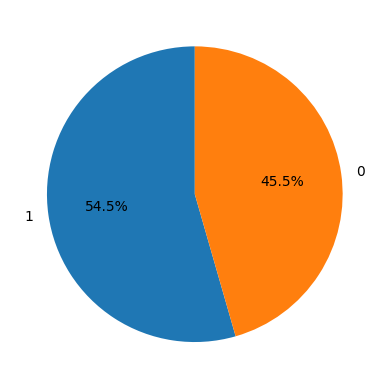

In [ ]:
value_counts = df['Heart Disease'].value_counts()
values = value_counts.index
counts = value_counts.values
plt.pie(counts, labels=values, autopct='%1.1f%%', startangle=90)

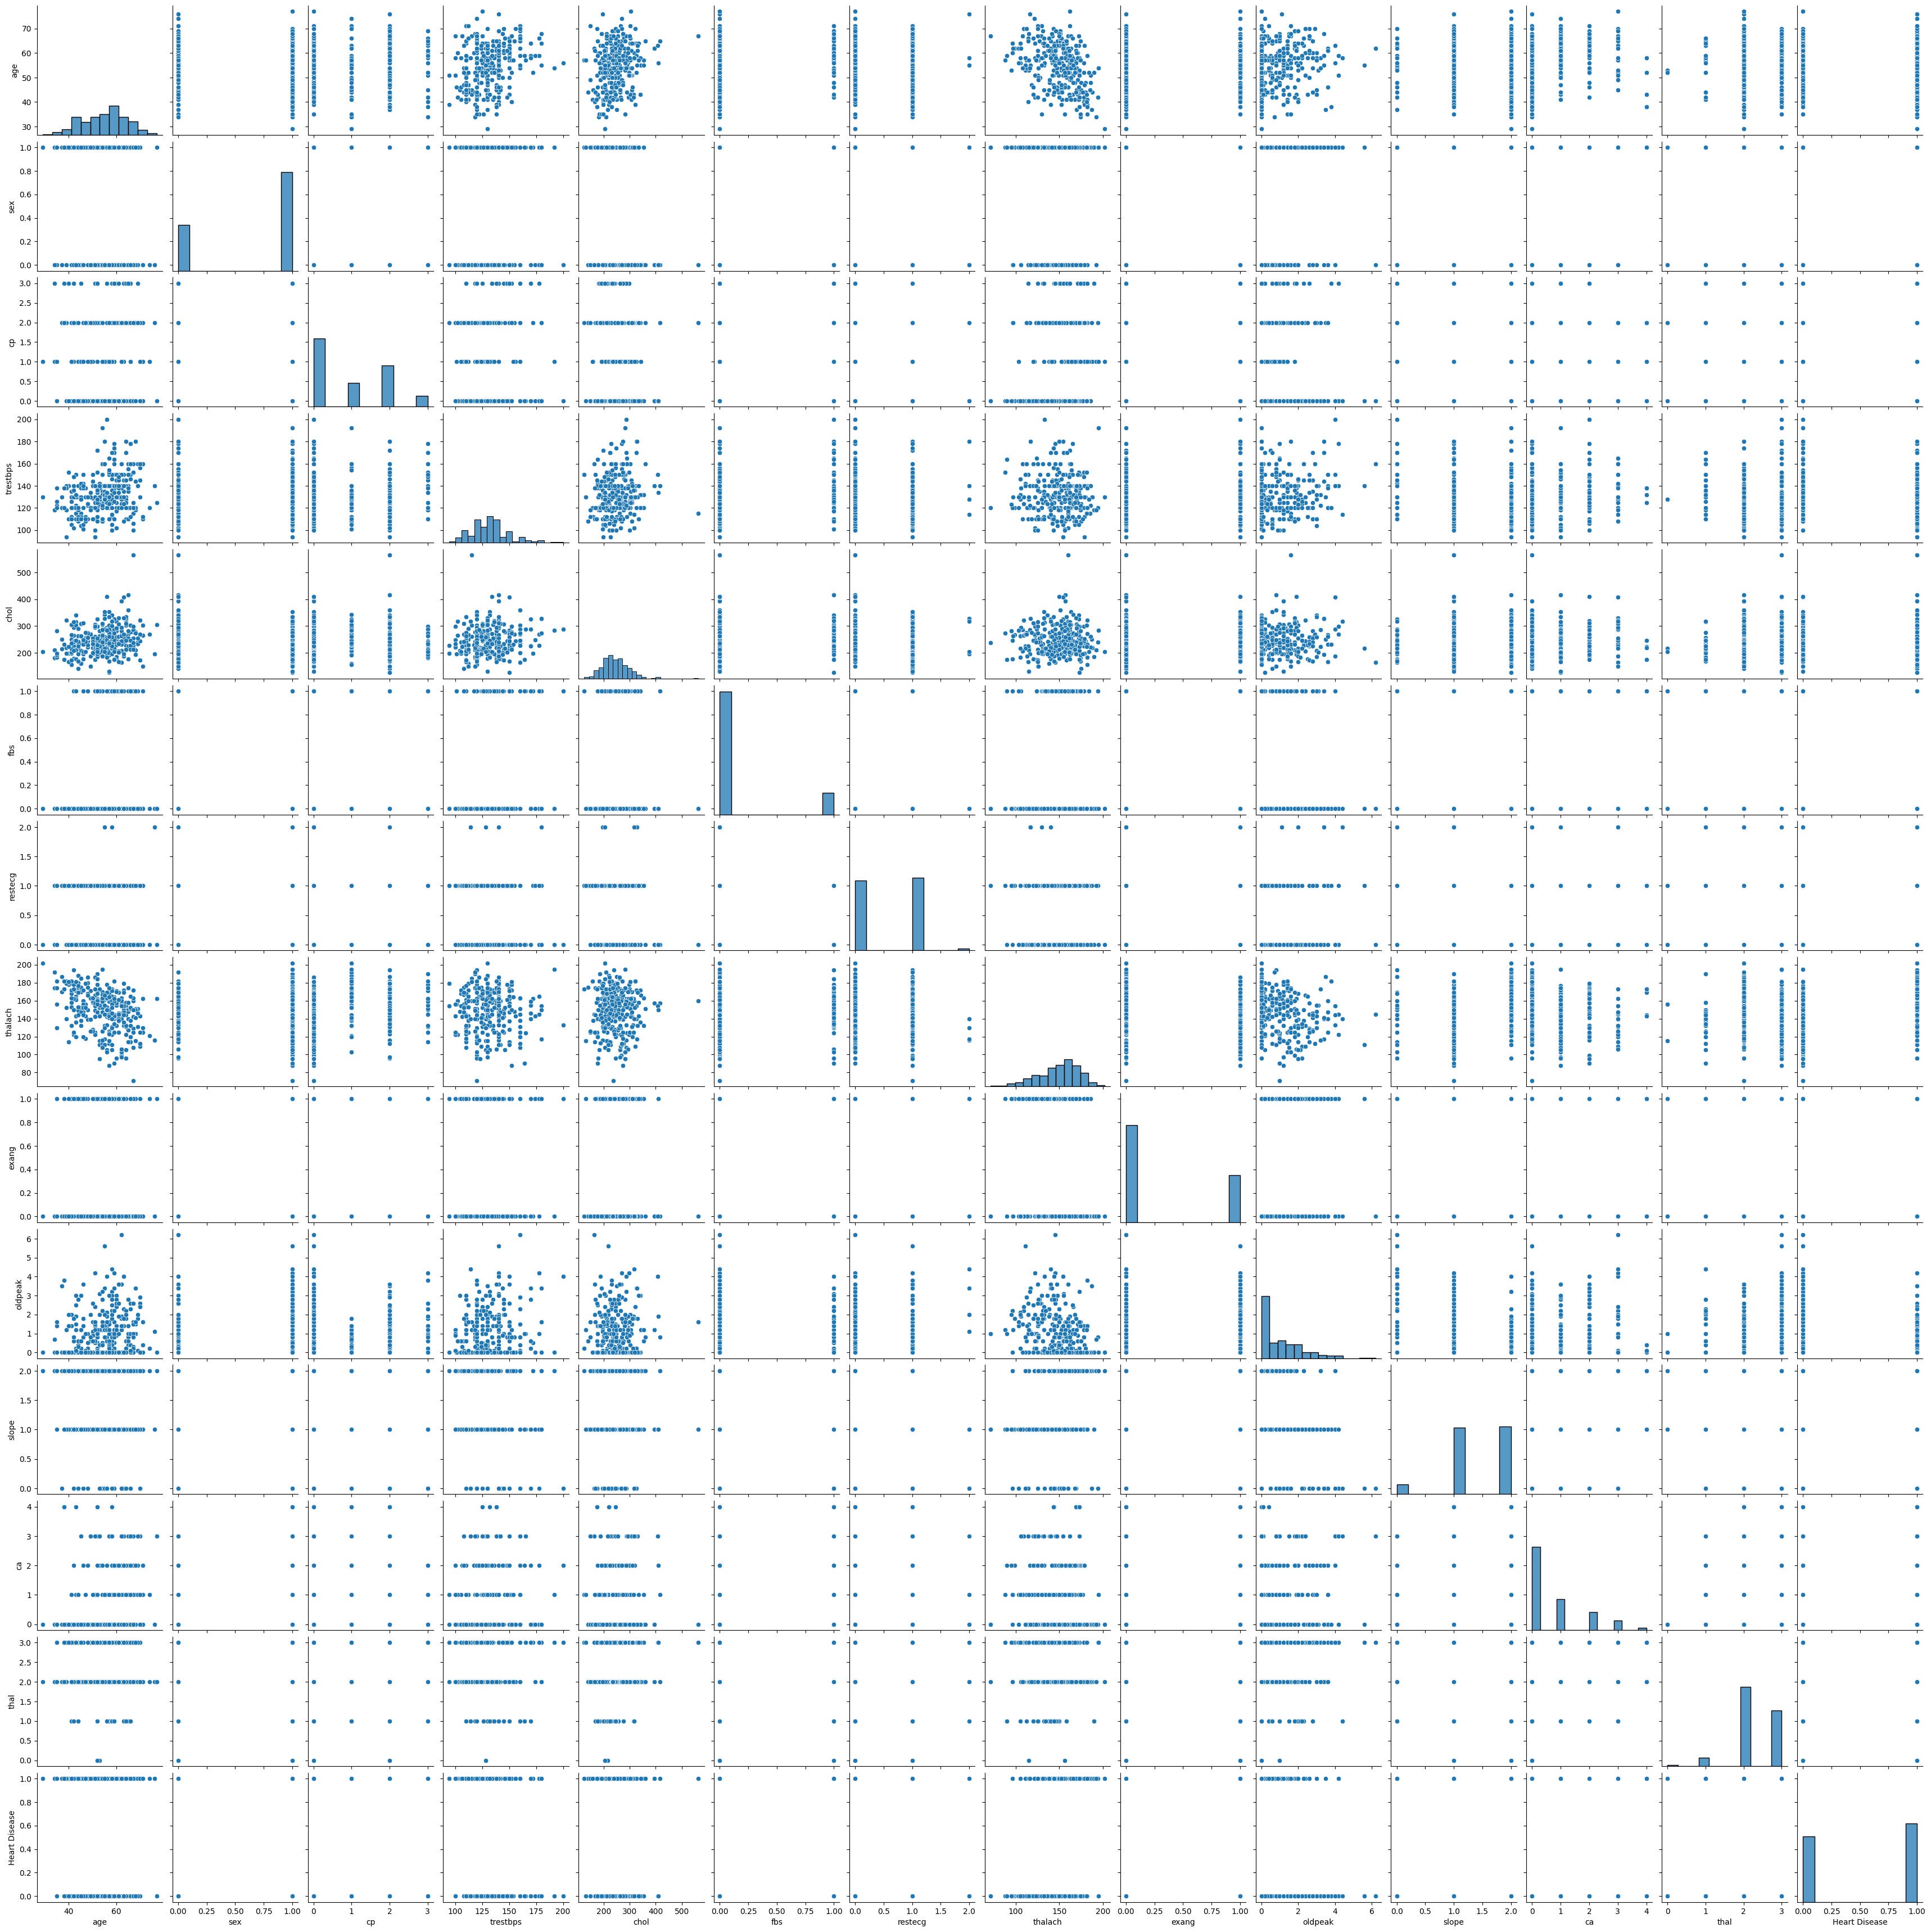

In [ ]:
sns.pairplot(df)

<Axes: xlabel='sex', ylabel='Heart Disease'>

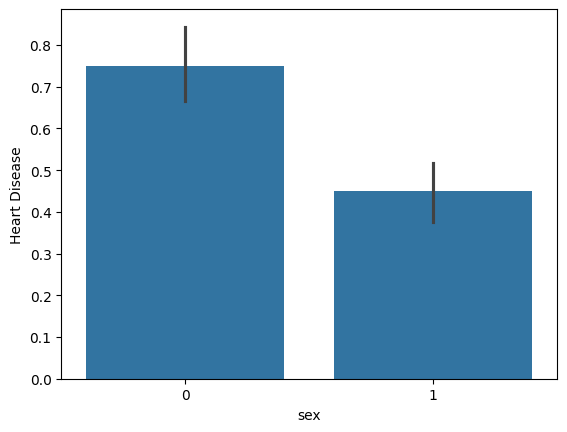

In [ ]:
sns.barplot(x = "sex",y="Heart Disease",data=df)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'Heart Disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

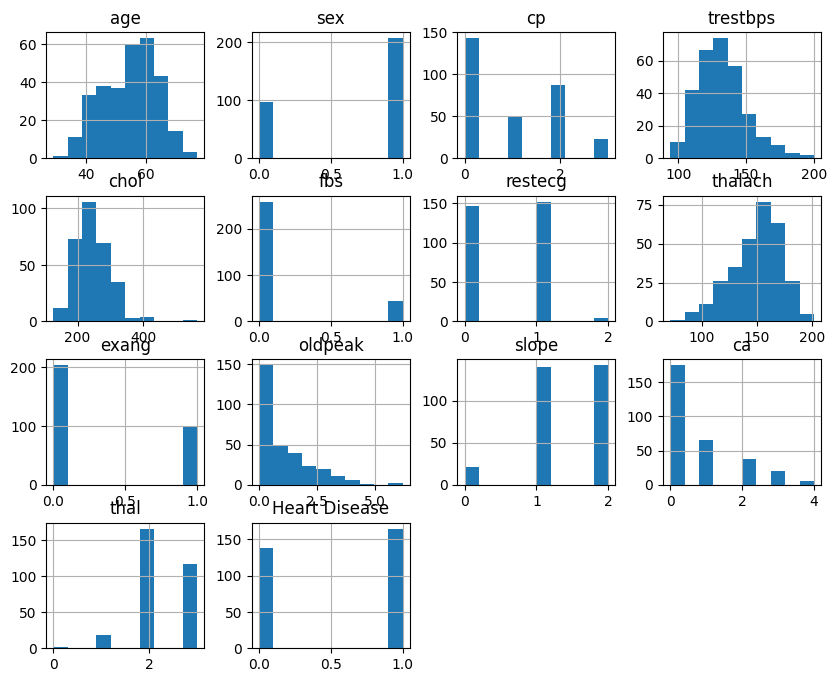

In [ ]:
df.hist(figsize=(10,8))

This picture shows a graph with health-related statistics, perhaps concerning heart disease.
Blue bars on a white background represent different variables, such as age and sex.Each section is labelled with phrases like 'cp' and 'thalath', while numbers represent values.

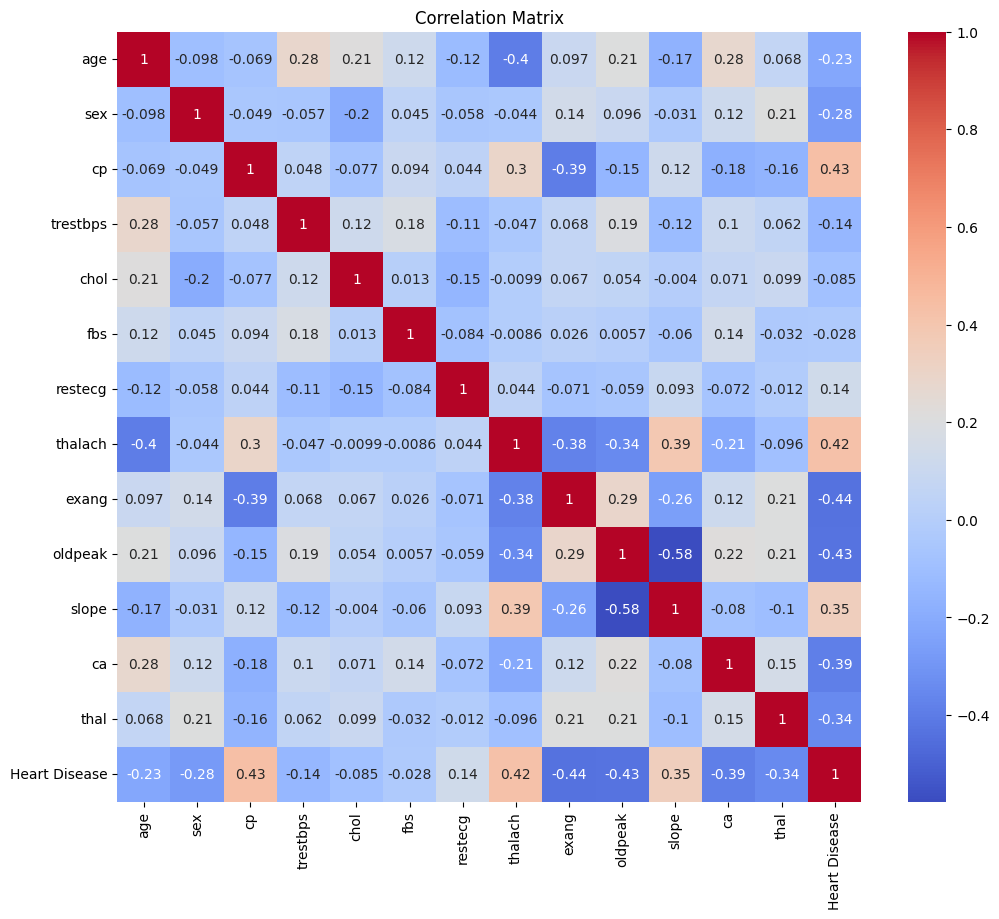

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This picture shows a correlation matrix for heart disease.
 Each cell represents how strongly and in which direction two elements are connected, with values ranging from -0.44 to 1.
 Colours ranging from white to blue represent the intensity of association. Abbreviations such as 'cp' for chest pain and 'ca' for the number of main vessels coloured by fluoroscopy indicate various health indicators

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  Heart Disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity Check:
if X_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")

Progress Further


Model 1: Decision Tree Classifier

In [ ]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_decisiontree = decisiontree.predict(X_test)
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
print("Accuracy of Logistic Regression model:", accuracy_decisiontree)

Accuracy of Logistic Regression model: 0.7472527472527473


Using the training data, this code trains a Decision Tree Classifier, then uses the test data to generate predictions, computes the accuracy of the model's predictions, and outputs the accuracy score. The Decision Tree Classifier model has an estimated accuracy of 73.6%.

Model 2: Random forest classifier model

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_randomforest = randomforest.predict(X_test)
accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print("Accuracy of Random Forest Classifier model:", accuracy_randomforest)

Accuracy of Random Forest Classifier model: 0.7912087912087912


This code trains a RandomForestClassifier on the training data, makes predictions on the test data, calculates the accuracy of the model predictions, and prints the accuracy value.The accuracy of the random forest classifier model is approximately 83.5%.

Conclude: Which Model best performed in your dataset?

In [ ]:
if accuracy_decisiontree > accuracy_randomforest:
    print("Decision tree classifier model performs better.")
else:
    print("Random Forest Classifier model performs better.")

Random Forest Classifier model performs better.


Hyper-parameter Optimization with Cross-Validation.

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
     'bootstrap': [True, False],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


This code uses GridSearchCV to use the hyperparameters of a RandomForestClassifier. It searches a variety of hyperparameter combinations.

Feature Selection

In [ ]:
best_feature= RandomForestClassifier(max_depth=best_params['max_depth'],
                                  criterion=best_params['criterion'],
                                     bootstrap=best_params['bootstrap'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'])
recursivefeature = RFE(estimator=best_feature, n_features_to_select=5, verbose=1)
recursivefeature.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[recursivefeature.support_]
print("Selected Features:", selected_features)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Selected Features: Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


This code performs feature selection using recursive feature removal with the RandomForestClassifier estimator.
 The top five features are selected based on their importance.
 The output displays the selected features ( "cp", "thalach", "oldpeak", "ca", and "thal").

Final Model

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
final_model = RandomForestClassifier(max_depth=best_params['max_depth'],
                                  criterion=best_params['criterion'],
                                     bootstrap=best_params['bootstrap'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'])
final_model.fit(X_train_selected, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

**This code initializes a Random Forest Classifier with specific settings and trains it using training data.<br>
 The classifier combines multiple decision trees to make predictions.**

**Conclusion**

Overall, the code serves as a comprehensive starting point for data exploration and analysis, followed by classification.